In [1]:
import pandas as pd
import scanpy as sc

In [2]:
adata = sc.read_h5ad("./output/adata_v2.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 2730 × 1000
    obs: 'paul15_clusters', 'n_counts_all', 'louvain', 'louvain_anno', 'cell_type', 'dpt_pseudotime'
    var: 'n_counts', 'mean', 'std'
    uns: 'cell_type_colors', 'dendrogram_cell_type', 'diffmap_evals', 'draw_graph', 'iroot', 'log1p', 'louvain', 'louvain_anno_colors', 'louvain_anno_sizes', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'paul15_clusters_colors', 'pca', 'tsne'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Read the transition indicies
---

In [4]:
def read_tab_separated_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    data = []
    for line in lines:
        # Strip any surrounding whitespace and split by tabs
        numbers = line.strip().split(', ')
        # Convert the strings to integers or floats
        numbers = [str(int(num)) for num in numbers]
        data.append(numbers)
    
    return data

transition_indicies_filepath = './data/transition_indices.txt'
data_cell_indicies = read_tab_separated_file(transition_indicies_filepath)


In [5]:
data_cell_indicies[0]

['56',
 '233',
 '266',
 '998',
 '1156',
 '1379',
 '1497',
 '1659',
 '2063',
 '2266',
 '2315',
 '2464',
 '2637']

### Read the cell pairs file

In [6]:
def read_tab_separated_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    data = []
    for line in lines:
        # Strip any surrounding whitespace and split by tabs
        cells = line.strip().split(', ')
        # Convert the strings to integers or floats
        cells = [str(cell) for cell in cells]
        data.append(cells)
    
    return data

cell_pairs_filepath = './data/cell_pairs.txt'
data_cell_pairs = read_tab_separated_file(cell_pairs_filepath)

In [7]:
data_cell_pairs

[['Ery0', 'Ery1'],
 ['Ery1', 'Ery3'],
 ['HPC', 'Monocyte Progenitor'],
 ['Ery3', 'Ery4'],
 ['HPC', 'Monocyte Progenitor', 'Neutrophils'],
 ['Ery0', 'Ery2', 'Ery3', 'Ery4'],
 ['Ery0', 'Ery4'],
 ['Monocyte Progenitor', 'Neutrophils'],
 ['Early Progenitor', 'HPC'],
 ['HPC', 'Neutrophils'],
 ['Early Progenitor', 'Ery4'],
 ['Ery4', 'Mep'],
 ['Ery0', 'Ery2', 'Ery4'],
 ['Ery0', 'Ery3', 'Ery4'],
 ['Basophil', 'HPC'],
 ['Basophil', 'Neutrophils'],
 ['Ery4', 'HPC', 'Neutrophils'],
 ['Ery2', 'Ery4'],
 ['Ery0', 'Mep'],
 ['Ery0', 'HPC', 'Neutrophils'],
 ['Basophil', 'HPC', 'Neutrophils'],
 ['HPC', 'Lymph'],
 ['Ery0', 'HPC', 'Monocyte Progenitor', 'Neutrophils'],
 ['Ery0', 'Ery3'],
 ['Ery0', 'HPC'],
 ['Ery0', 'Monocyte Progenitor', 'Neutrophils'],
 ['DC', 'HPC']]

In [8]:
for idx in range(len(data_cell_indicies)):
    if len(data_cell_indicies[idx]) > 7:
        print(f"idx: {data_cell_indicies[idx]}")
        print(f"hyb: {data_cell_pairs[idx]}")
        print("---"*30)

idx: ['56', '233', '266', '998', '1156', '1379', '1497', '1659', '2063', '2266', '2315', '2464', '2637']
hyb: ['Ery0', 'Ery1']
------------------------------------------------------------------------------------------
idx: ['195', '304', '1042', '1178', '1201', '1765', '1976', '2272', '2562']
hyb: ['Ery1', 'Ery3']
------------------------------------------------------------------------------------------
idx: ['242', '713', '2560', '1008', '2017', '2569', '1494', '1977', '2598', '1735', '2635', '2170', '2183', '64', '112', '523', '904', '1369', '1437', '1505', '1678', '2609', '2706']
hyb: ['Ery0', 'Ery4']
------------------------------------------------------------------------------------------
idx: ['265', '2599', '2642', '183', '2555', '410', '509', '567', '1283', '2347']
hyb: ['Monocyte Progenitor', 'Neutrophils']
------------------------------------------------------------------------------------------
idx: ['899', '2196', '2404', '1642', '2048', '2076', '583', '1547', '620', '2596'

Here we have a large set of cells for >7 for These cell Hybrids, Plot only those:
- Ery0-Ery1
- Ery1-Ery3
- Ery0-Ery4
- Monocyte Progenitor-Neutrophils
- HPC-Neutrophils

### Make a copy of cell_type column in obs dataframe and name it as cell_type_w_hybrids

In [9]:
adata.obs

paul15_clusters  n_counts_all louvain louvain_anno            cell_type  \
0               7MEP         353.0       8            8                 Ery4   
1               15Mo        2556.0       1            1  Monocyte Progenitor   
2               3Ery        4649.0      17           17                 Ery0   
3               15Mo        4486.0       2            2          Neutrophils   
4               3Ery        5205.0      17           17                 Ery0   
...              ...           ...     ...          ...                  ...   
2725            2Ery        4873.0       6            6                 Ery1   
2726          13Baso        3553.0      24        24/Mo  Monocyte Progenitor   
2727            7MEP         443.0       8            8                 Ery4   
2728            15Mo        3252.0       2            2          Neutrophils   
2729            3Ery        6401.0       3            3                 Ery0   

      dpt_pseudotime  
0           0.225547  
1           0.273524  
2           0.710179  
3           0.267904  
4           0.781939  
...              ...  
2725        0.649140  
2726        0.298521  
2727        0.196117  
2728        0.264164  
2729        0.762039  

[2730 rows x 6 columns]

In [10]:
adata.obs["cell_type_w_hybrids"] = adata.obs['cell_type']

In [11]:
assert len(data_cell_indicies) == len(data_cell_pairs)

In [12]:
for idx in range(len(data_cell_indicies)):
    indices = data_cell_indicies[idx]
    cell_types = data_cell_pairs[idx]
    cell_type_name_hyb = "-".join(cell_types) + "-Hybrid"
    adata.obs['cell_type_w_hybrids'].cat.add_categories(cell_type_name_hyb, inplace=True)
    # Rename the cell_type for the given indices to 'xyz'
    adata.obs.loc[indices, 'cell_type_w_hybrids'] = cell_type_name_hyb

/usr/local/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [13]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rc_context

In [14]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = "./data/paul15.h5ad"
# low dpi (dots per inch) yields small inline figures
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(3, 3), facecolor="white", color_map="viridis_r")

-----
anndata     0.8.0
scanpy      1.9.3
-----
PIL                 9.5.0
anyio               NA
arrow               1.2.3
attr                23.2.0
babel               2.14.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cached_property     1.5.2
certifi             2024.07.04
cffi                1.15.1
charset_normalizer  3.3.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.7.0
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
fastjsonschema      NA
fqdn                NA
h5py                3.8.0
idna                3.7
igraph              0.10.8
importlib_resources NA
ipykernel           6.16.2
ipython_genutils    0.2.0
isoduration         NA
jedi                0.19.1
jinja2              3.1.4
joblib              1.3.2
json5               NA
jsonpointer         3.0.0
jsonschema          4.17.3
jupyter_server      1.24.0
jupyterlab_server   2.24.0
kiwisolver          1.4.5


### 1. Plotting Ery0-Ery1 Hybrids

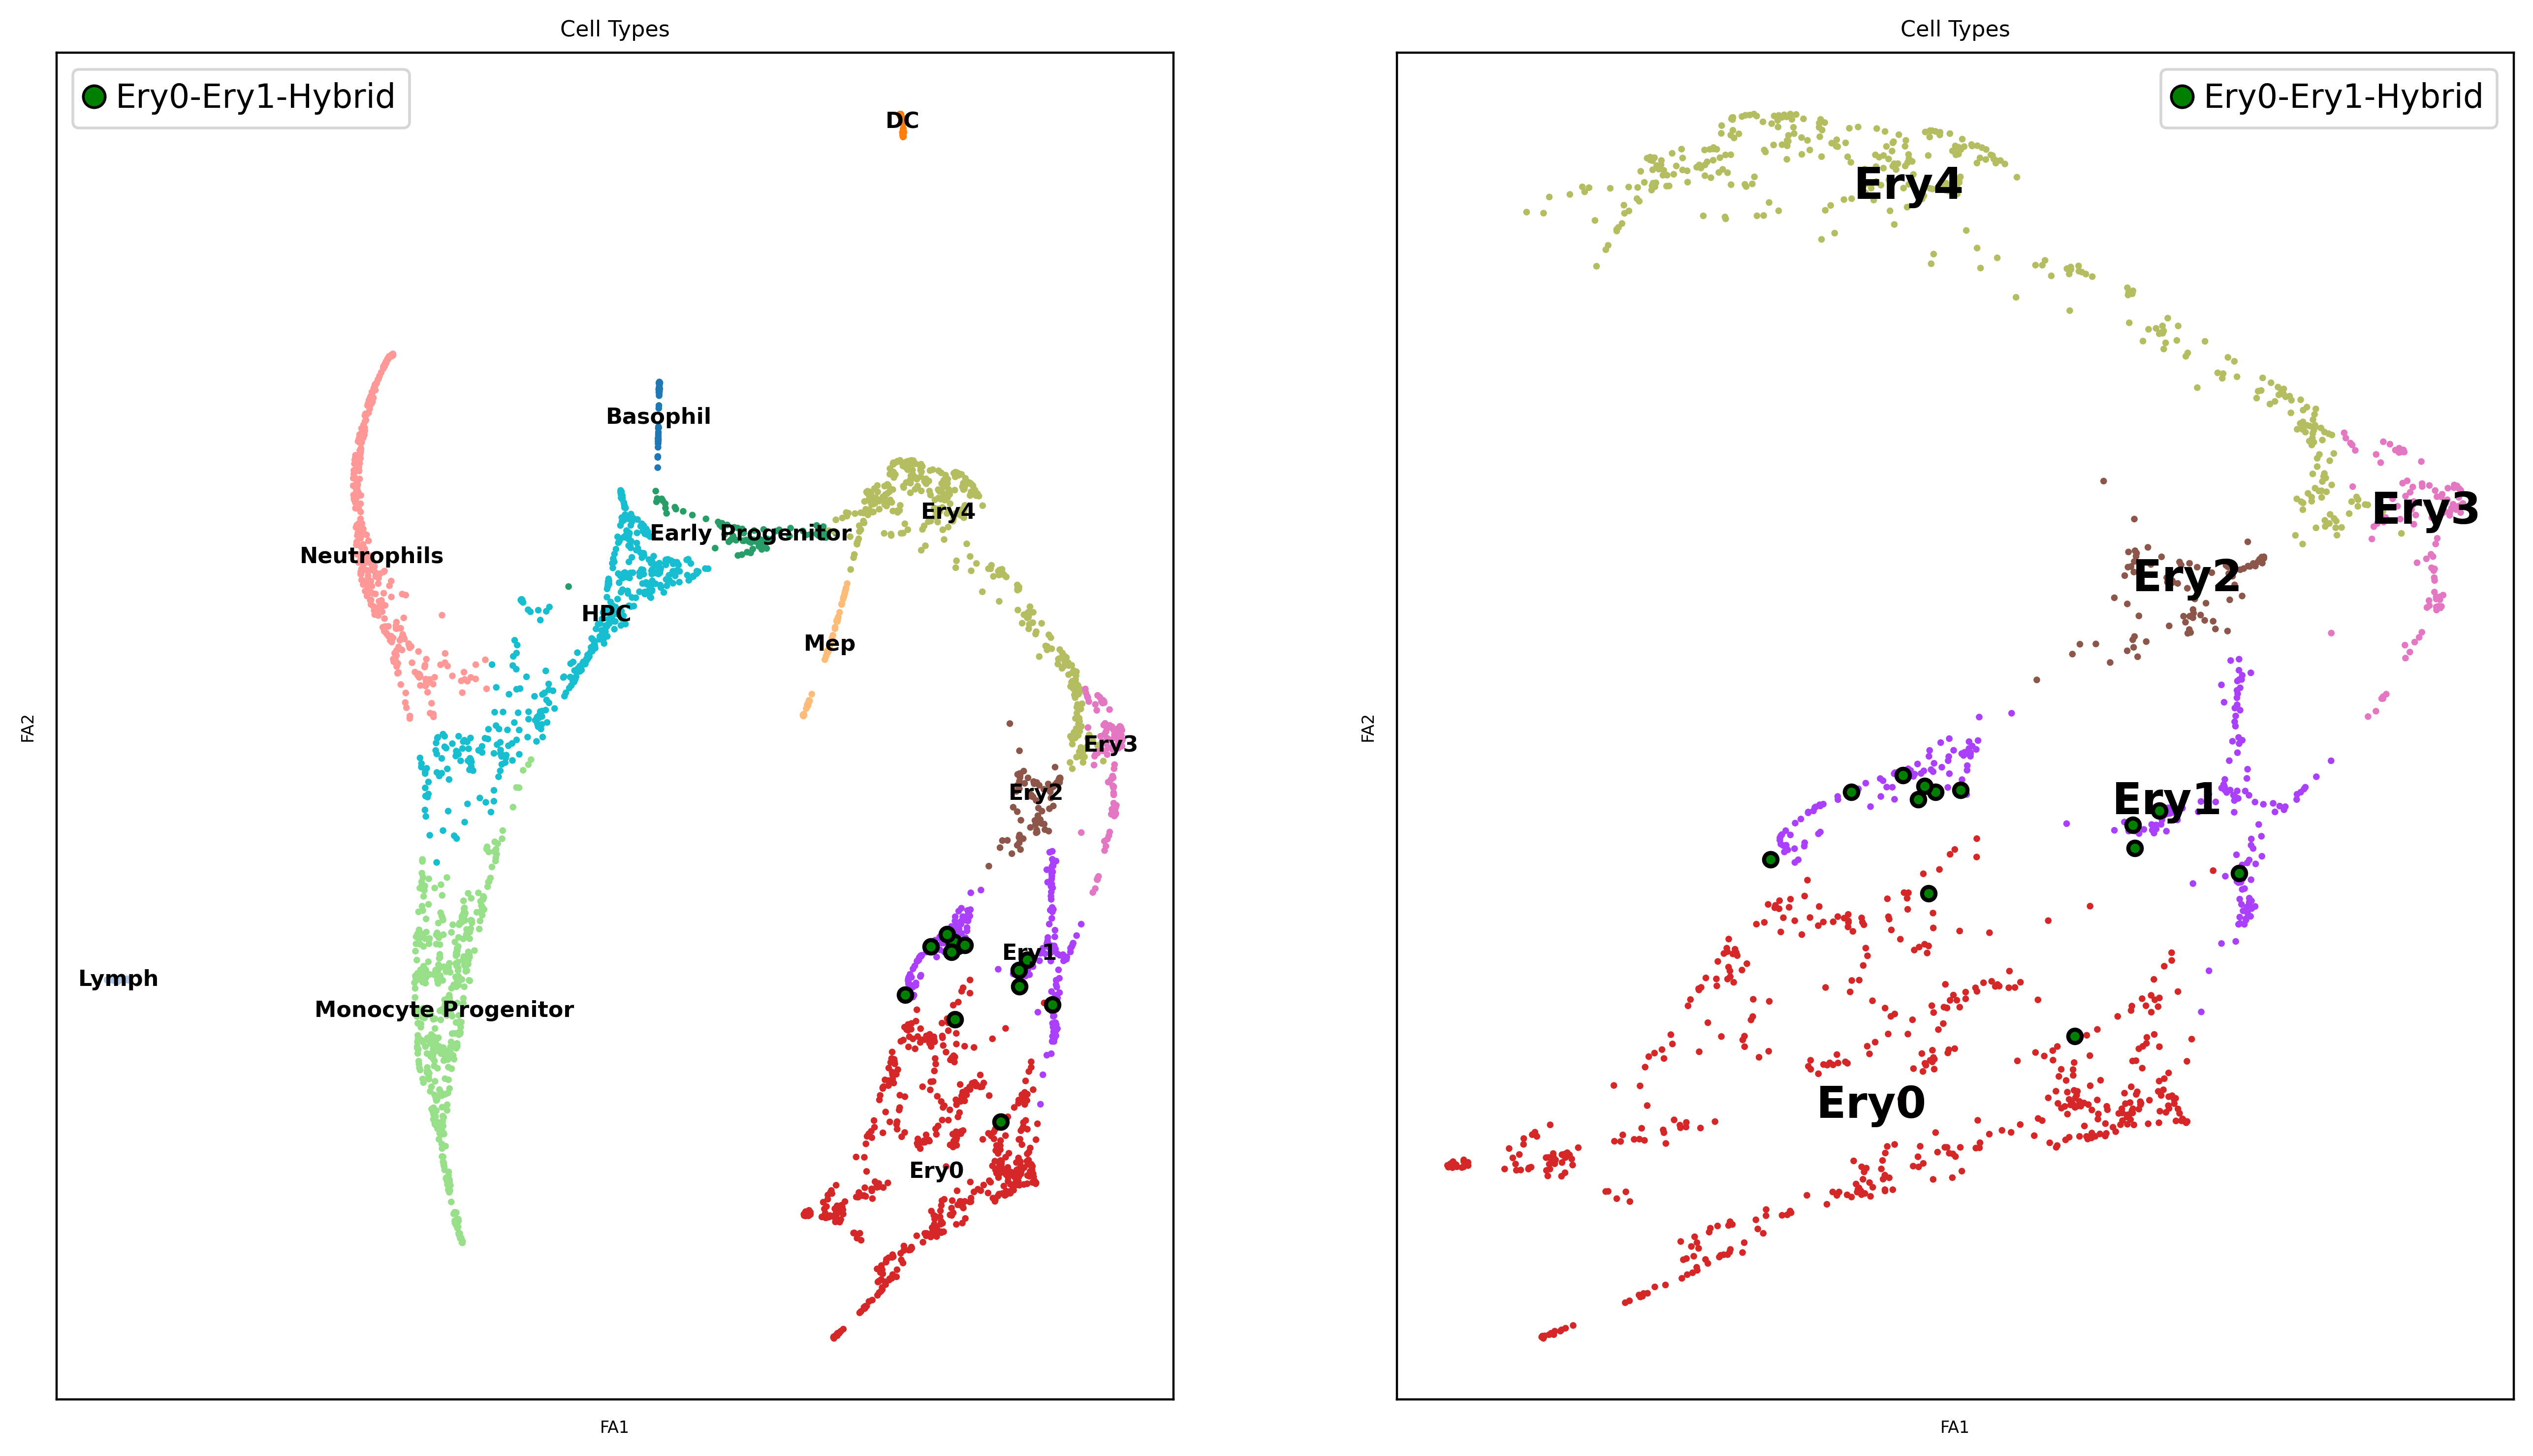

In [16]:
from matplotlib import rc_context
from matplotlib.lines import Line2D
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (16, 9),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Filter the AnnData object
    filtered_adata = adata[adata.obs["cell_type"].isin(["Ery0", "Ery1","Ery2","Ery3","Ery4"])]
    # Plot the graph
    # Create a figure with two subplots
    fig, axes = pl.subplots(1, 2)
    sc.pl.draw_graph(
        adata, 
        color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=24,
        legend_fontsize=8,
        frameon=True,
        edges=False,
        ax=axes[0],  # Use the first axis
        show=False
    )
    sc.pl.draw_graph(
        filtered_adata, 
        color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=24,
        legend_fontsize=16,
        frameon=True,
        edges=False,
        ax=axes[1],  # Use the first axis
        show=False
    )
    
    # Get the coordinates for the scatter plot
    x = filtered_adata.obsm['X_draw_graph_fa'][:, 0]
    y = filtered_adata.obsm['X_draw_graph_fa'][:, 1]
    
    # Overlay scatter plot for a specific cell type with different edge color
    specific_cell_type = "Ery0-Ery1-Hybrid"  # Specify the cell type
    specific_idx = filtered_adata.obs['cell_type_w_hybrids'] == specific_cell_type

    # Scatter plot for the specific cell type with an outline
    axes[0].scatter(
        x[specific_idx], y[specific_idx], 
        facecolors='green', edgecolors='black', linewidth=1.5, s=24
    )
    # Scatter plot for the specific cell type with an outline
    axes[1].scatter(
        x[specific_idx], y[specific_idx], 
        facecolors='green', edgecolors='black', linewidth=1.5, s=24
    )
    # Create custom legends
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Ery0-Ery1-Hybrid', markerfacecolor='green', markeredgecolor='black', markersize=8),
    ]

    axes[0].legend(handles=legend_elements, loc='best', fontsize=12)
    axes[1].legend(handles=legend_elements, loc='best', fontsize=12)
    pl.savefig("./output/ery0-ery1-hyb.scatter.png")
    pl.show()

/usr/local/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/local/lib/python3.7/contextlib.py:119: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


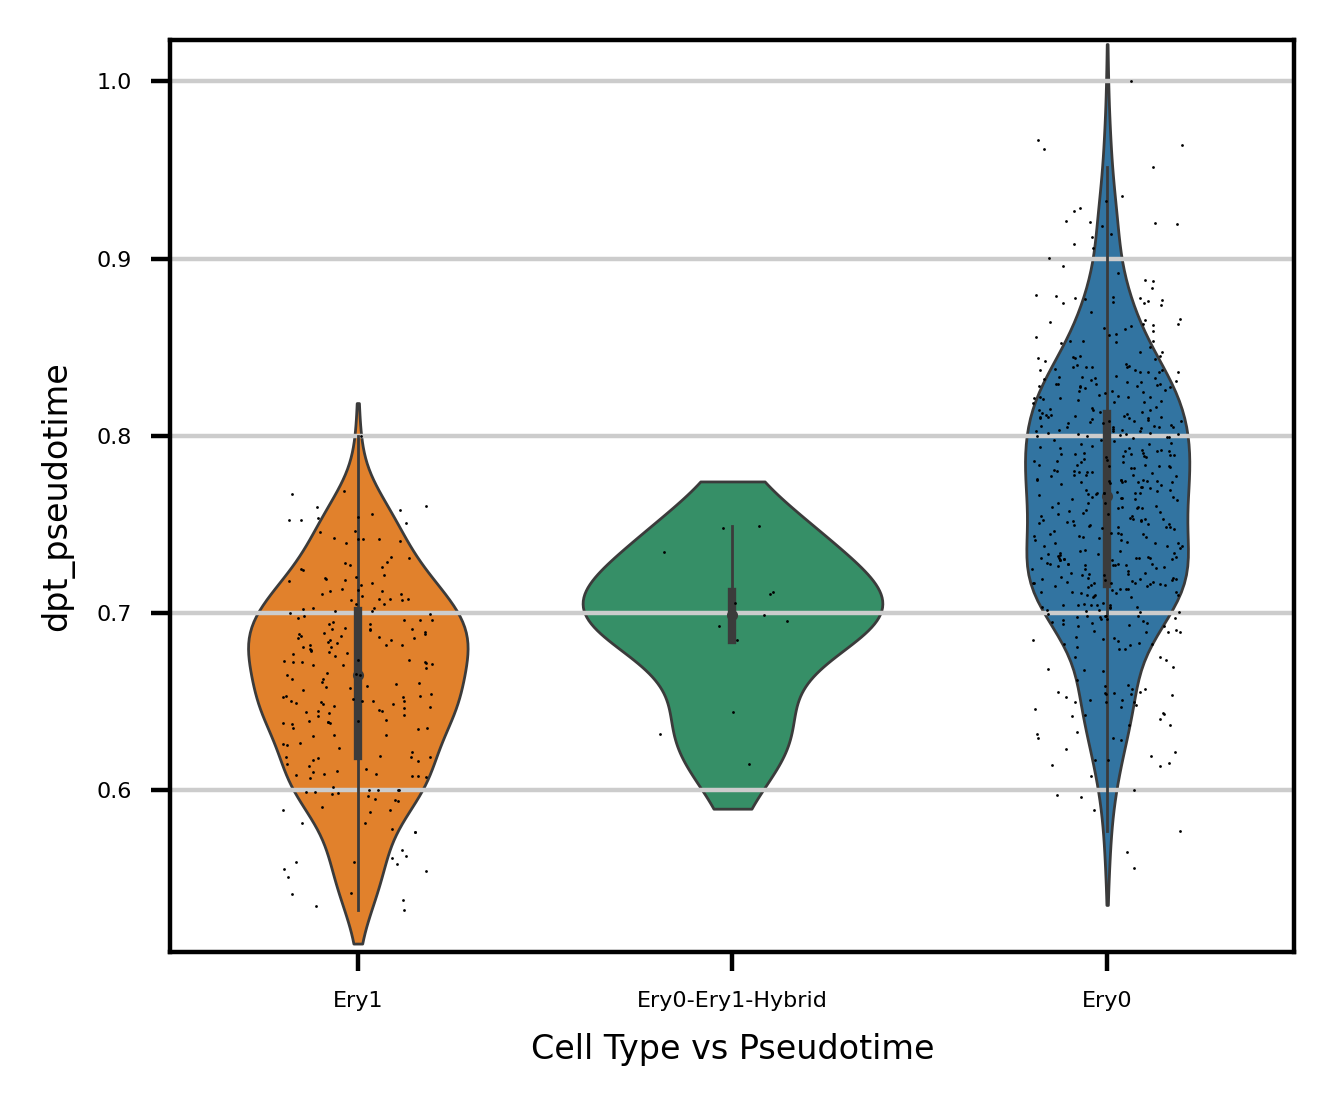

In [17]:
from matplotlib import rc_context
from matplotlib.lines import Line2D
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (4, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Filter the AnnData object
    filtered_adata = adata[adata.obs["cell_type_w_hybrids"].isin(["Ery0", "Ery1","Ery0-Ery1-Hybrid"])]
    # Plot the graph
    fig = sc.pl.violin(
        filtered_adata,
        ["dpt_pseudotime"],
        groupby="cell_type_w_hybrids",
        order=["Ery1","Ery0-Ery1-Hybrid", "Ery0"],
        rotation=0.0,
        linewidth=0.5,
        jitter=0.2,
        size=0.5,
        scale="area",
        inner="box",
        cut=1.0,
        xlabel="Cell Type vs Pseudotime",
        show=False
    )
    pl.savefig("./output/ery0-ery1-hyb.violin.png")
    pl.show()

### 2. Plotting Ery1-Ery3 Hybrids

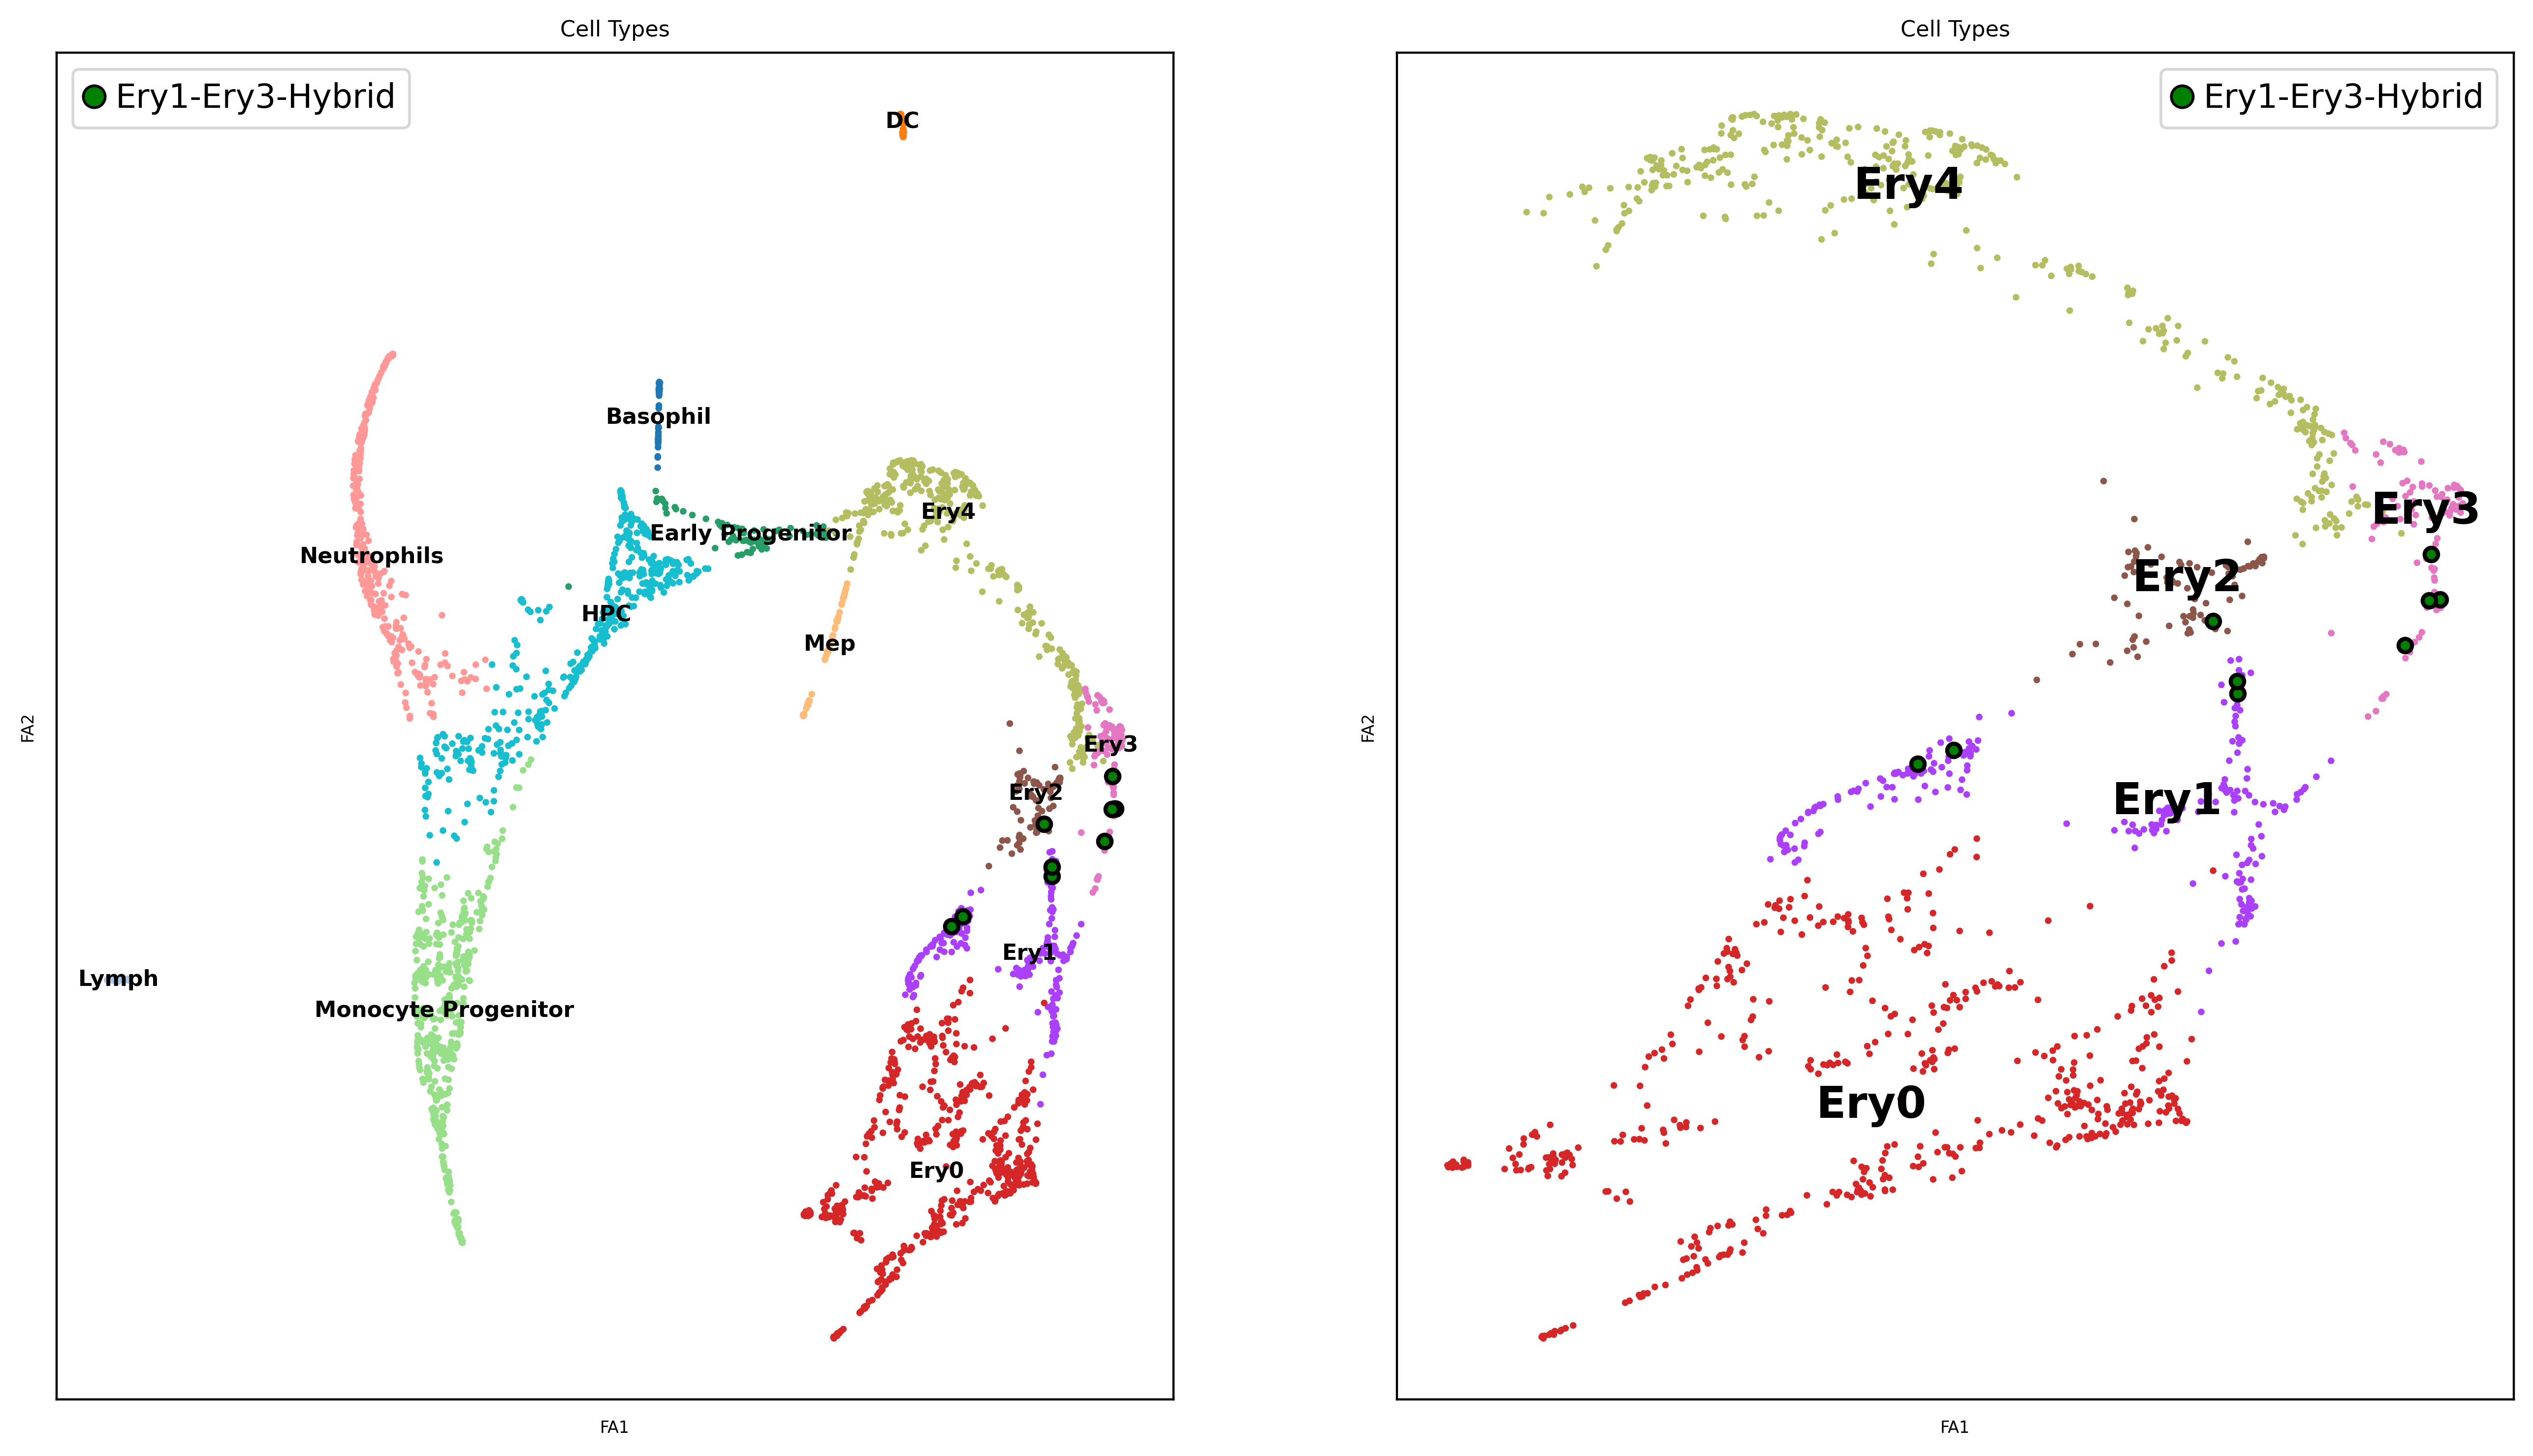

In [18]:
from matplotlib import rc_context
from matplotlib.lines import Line2D
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (16, 9),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Filter the AnnData object
    filtered_adata = adata[adata.obs["cell_type"].isin(["Ery0", "Ery1","Ery2","Ery3","Ery4"])]
    # Plot the graph
    # Create a figure with two subplots
    fig, axes = pl.subplots(1, 2)
    sc.pl.draw_graph(
        adata, 
        color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=24,
        legend_fontsize=8,
        frameon=True,
        edges=False,
        ax=axes[0],  # Use the first axis
        show=False
    )
    sc.pl.draw_graph(
        filtered_adata, 
        color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=24,
        legend_fontsize=16,
        frameon=True,
        edges=False,
        ax=axes[1],  # Use the first axis
        show=False
    )
    
    # Get the coordinates for the scatter plot
    x = filtered_adata.obsm['X_draw_graph_fa'][:, 0]
    y = filtered_adata.obsm['X_draw_graph_fa'][:, 1]
    
    # Overlay scatter plot for a specific cell type with different edge color
    specific_cell_type = "Ery1-Ery3-Hybrid"  # Specify the cell type
    specific_idx = filtered_adata.obs['cell_type_w_hybrids'] == specific_cell_type

    # Scatter plot for the specific cell type with an outline
    axes[0].scatter(
        x[specific_idx], y[specific_idx], 
        facecolors='green', edgecolors='black', linewidth=1.5, s=24
    )
    # Scatter plot for the specific cell type with an outline
    axes[1].scatter(
        x[specific_idx], y[specific_idx], 
        facecolors='green', edgecolors='black', linewidth=1.5, s=24
    )
    # Create custom legends
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Ery1-Ery3-Hybrid', markerfacecolor='green', markeredgecolor='black', markersize=8),
    ]

    axes[0].legend(handles=legend_elements, loc='best', fontsize=12)
    axes[1].legend(handles=legend_elements, loc='best', fontsize=12)
    pl.savefig("./output/ery1-ery3-hyb.scatter.png")
    pl.show()

/usr/local/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/local/lib/python3.7/contextlib.py:119: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


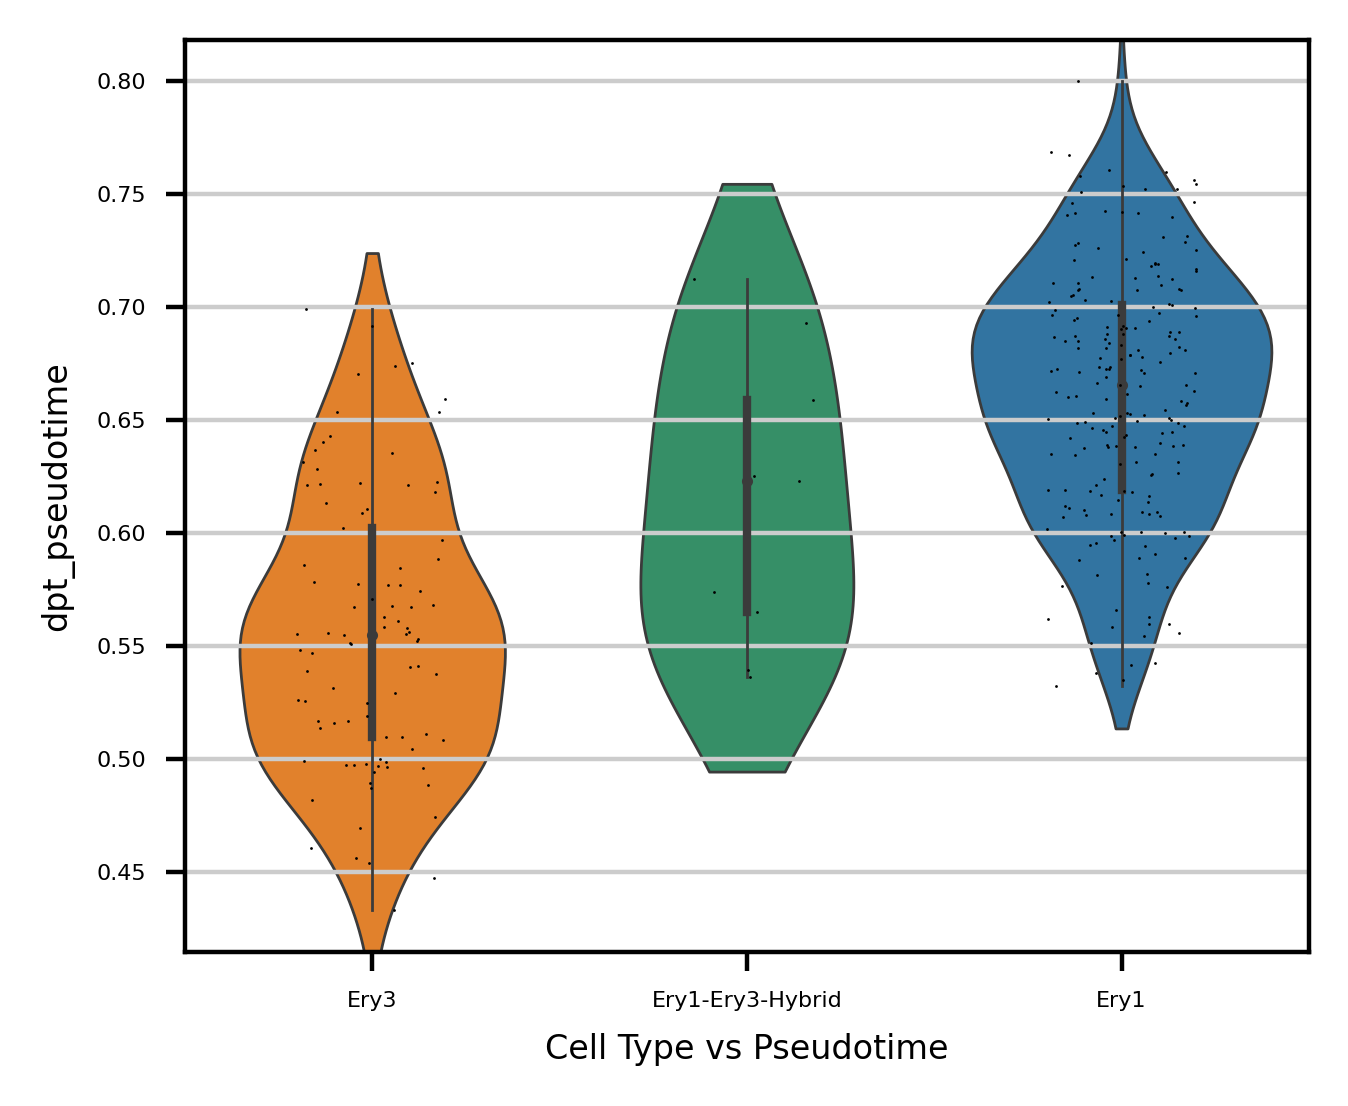

In [21]:
from matplotlib import rc_context
from matplotlib.lines import Line2D
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (4, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Filter the AnnData object
    filtered_adata = adata[adata.obs["cell_type_w_hybrids"].isin(["Ery1", "Ery3","Ery1-Ery3-Hybrid"])]
    # Plot the graph
    fig = sc.pl.violin(
        filtered_adata,
        ["dpt_pseudotime"],
        groupby="cell_type_w_hybrids",
        order=["Ery3","Ery1-Ery3-Hybrid","Ery1"],
        rotation=0.0,
        linewidth=0.5,
        jitter=0.2,
        size=0.5,
        scale="area",
        inner="box",
        cut=1.0,
        xlabel="Cell Type vs Pseudotime",
        multi_panel=True,
        show=False
    )
    pl.savefig("./output/ery1-ery3-hyb.voilin.png")
    pl.show()

### 3. Plotting Ery0-Ery4 Hybrids

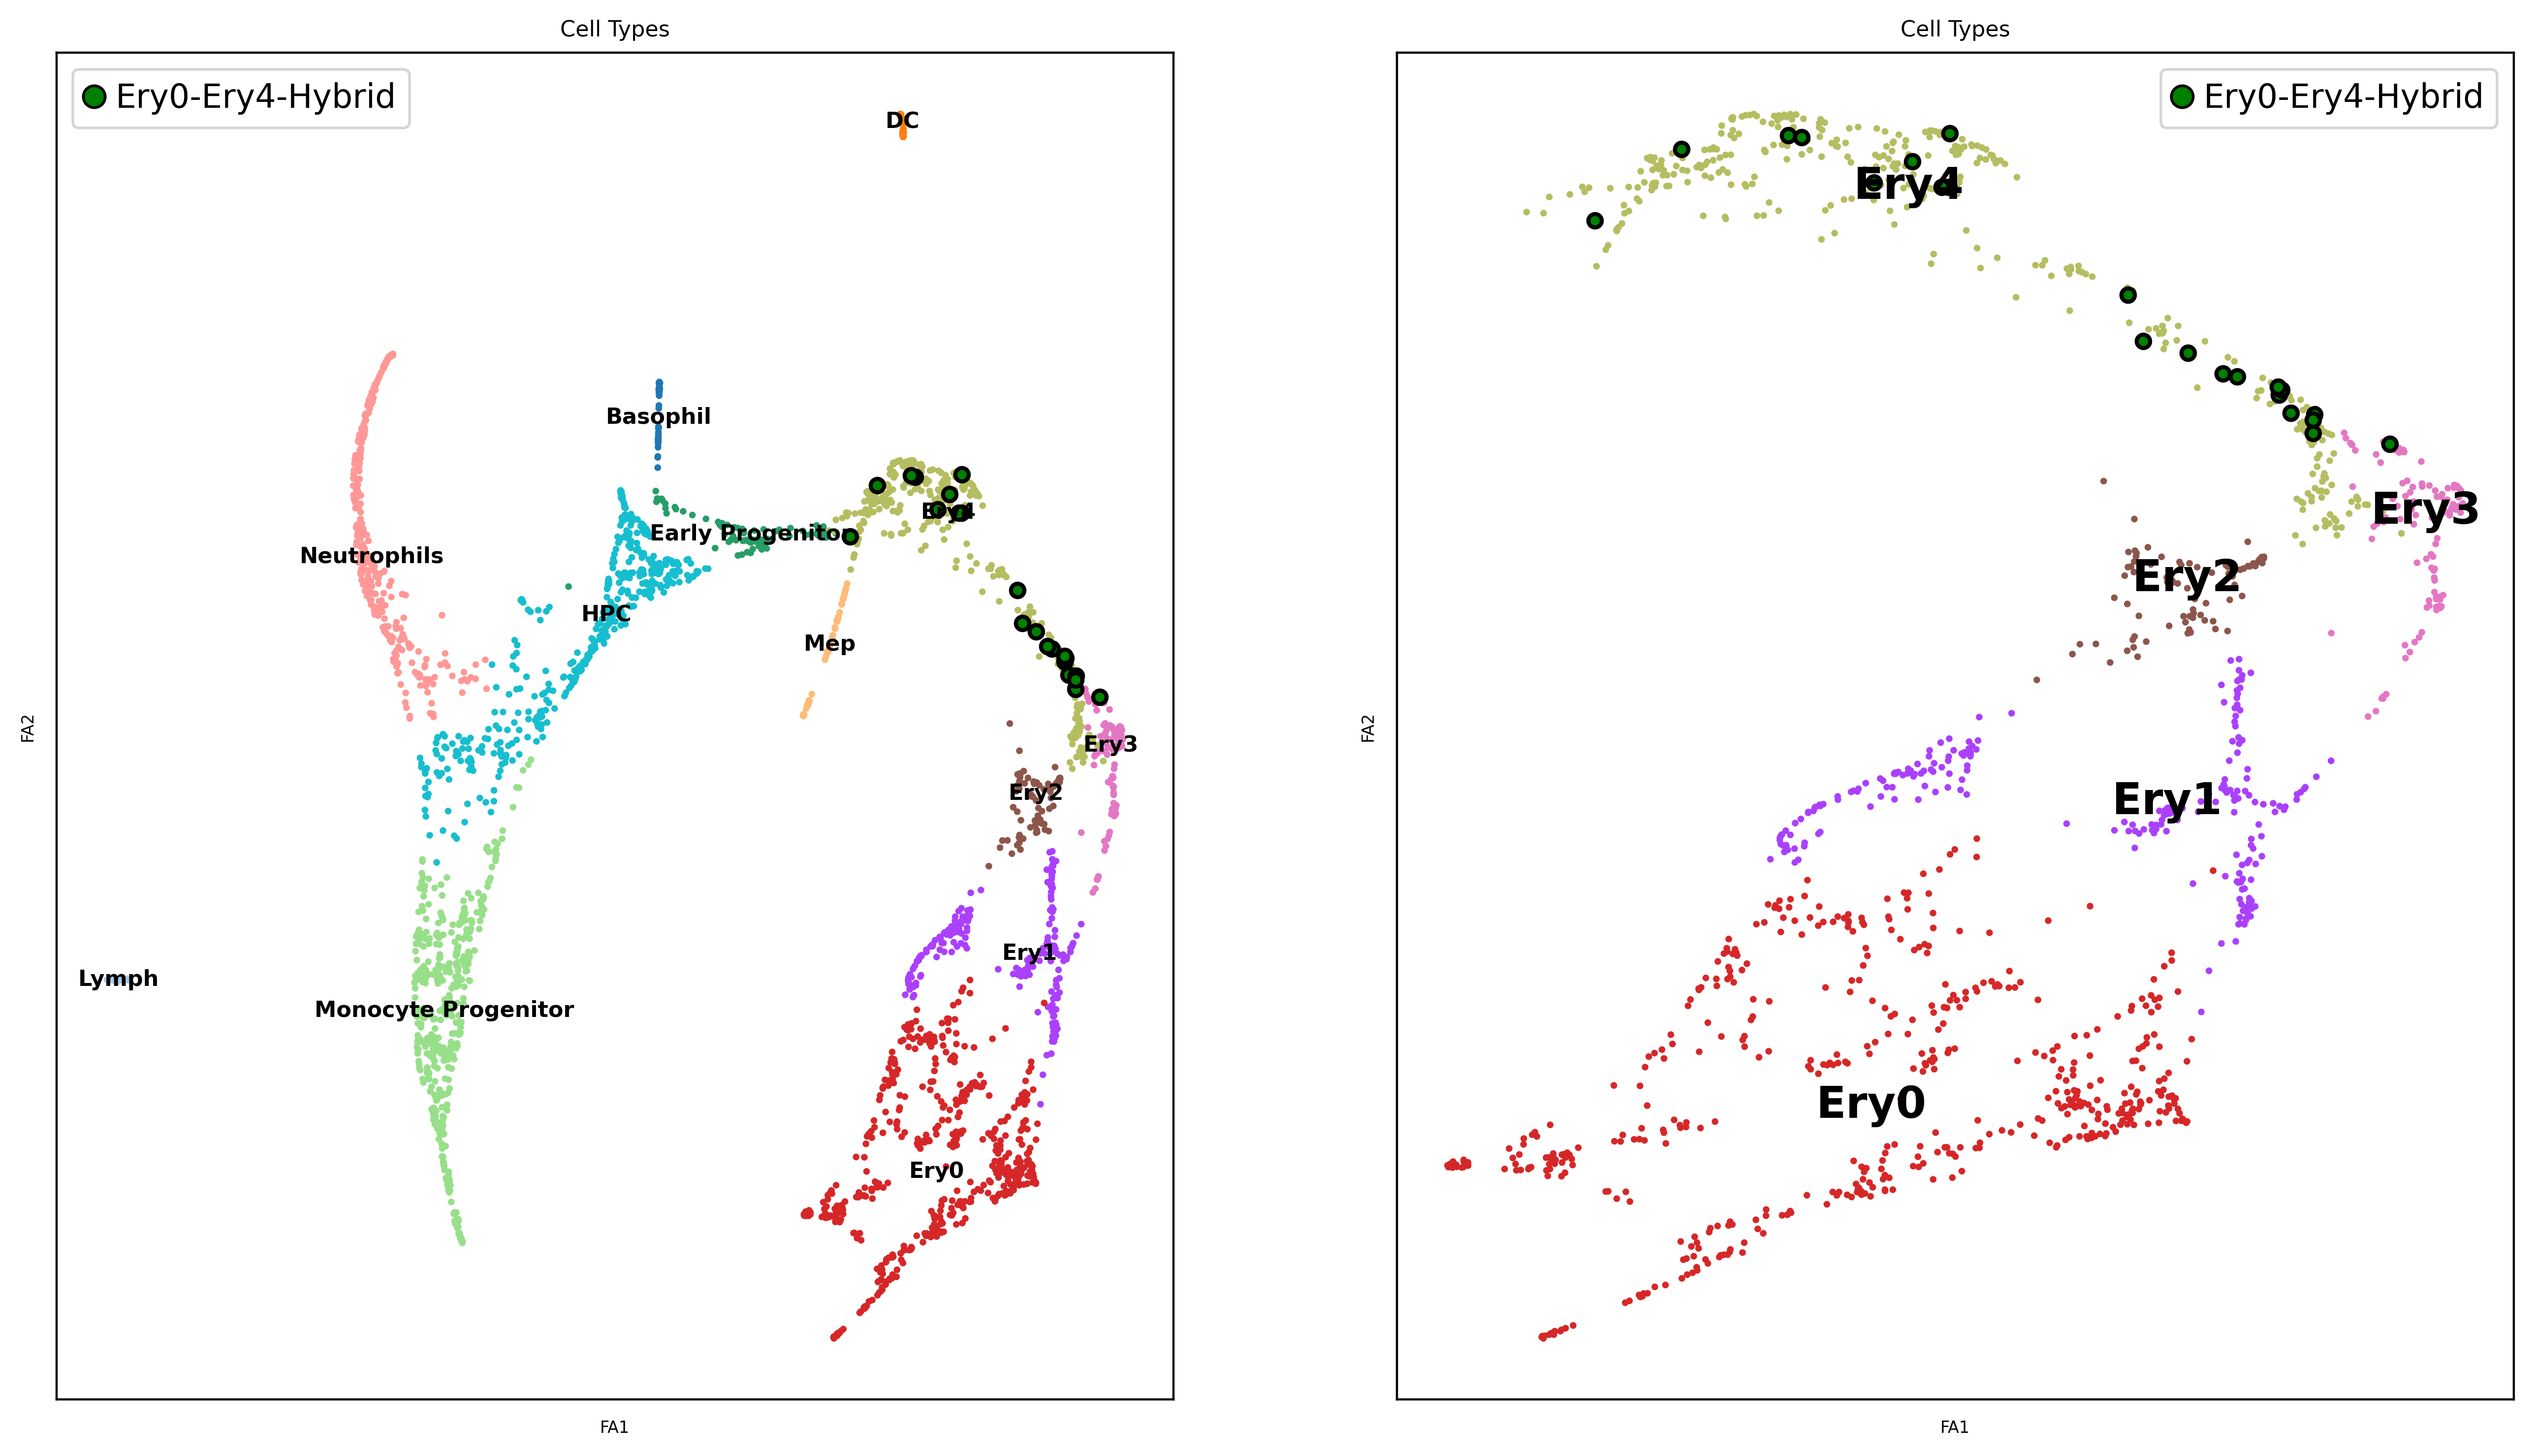

In [19]:
from matplotlib import rc_context
from matplotlib.lines import Line2D
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (16, 9),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Filter the AnnData object
    filtered_adata = adata[adata.obs["cell_type"].isin(["Ery0", "Ery1","Ery2","Ery3","Ery4"])]
    # Plot the graph
    # Create a figure with two subplots
    fig, axes = pl.subplots(1, 2)
    sc.pl.draw_graph(
        adata, 
        color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=24,
        legend_fontsize=8,
        frameon=True,
        edges=False,
        ax=axes[0],  # Use the first axis
        show=False
    )
    sc.pl.draw_graph(
        filtered_adata, 
        color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=24,
        legend_fontsize=16,
        frameon=True,
        edges=False,
        ax=axes[1],  # Use the first axis
        show=False
    )
    
    # Get the coordinates for the scatter plot
    x = filtered_adata.obsm['X_draw_graph_fa'][:, 0]
    y = filtered_adata.obsm['X_draw_graph_fa'][:, 1]
    
    # Overlay scatter plot for a specific cell type with different edge color
    specific_cell_type = "Ery0-Ery4-Hybrid"  # Specify the cell type
    specific_idx = filtered_adata.obs['cell_type_w_hybrids'] == specific_cell_type

    # Scatter plot for the specific cell type with an outline
    axes[0].scatter(
        x[specific_idx], y[specific_idx], 
        facecolors='green', edgecolors='black', linewidth=1.5, s=24
    )
    # Scatter plot for the specific cell type with an outline
    axes[1].scatter(
        x[specific_idx], y[specific_idx], 
        facecolors='green', edgecolors='black', linewidth=1.5, s=24
    )
    # Create custom legends
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Ery0-Ery4-Hybrid', markerfacecolor='green', markeredgecolor='black', markersize=8),
    ]

    axes[0].legend(handles=legend_elements, loc='best', fontsize=12)
    axes[1].legend(handles=legend_elements, loc='best', fontsize=12)
    pl.savefig("./output/ery0-ery4-hyb.scatter.png")
    pl.show()

/usr/local/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/local/lib/python3.7/contextlib.py:119: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


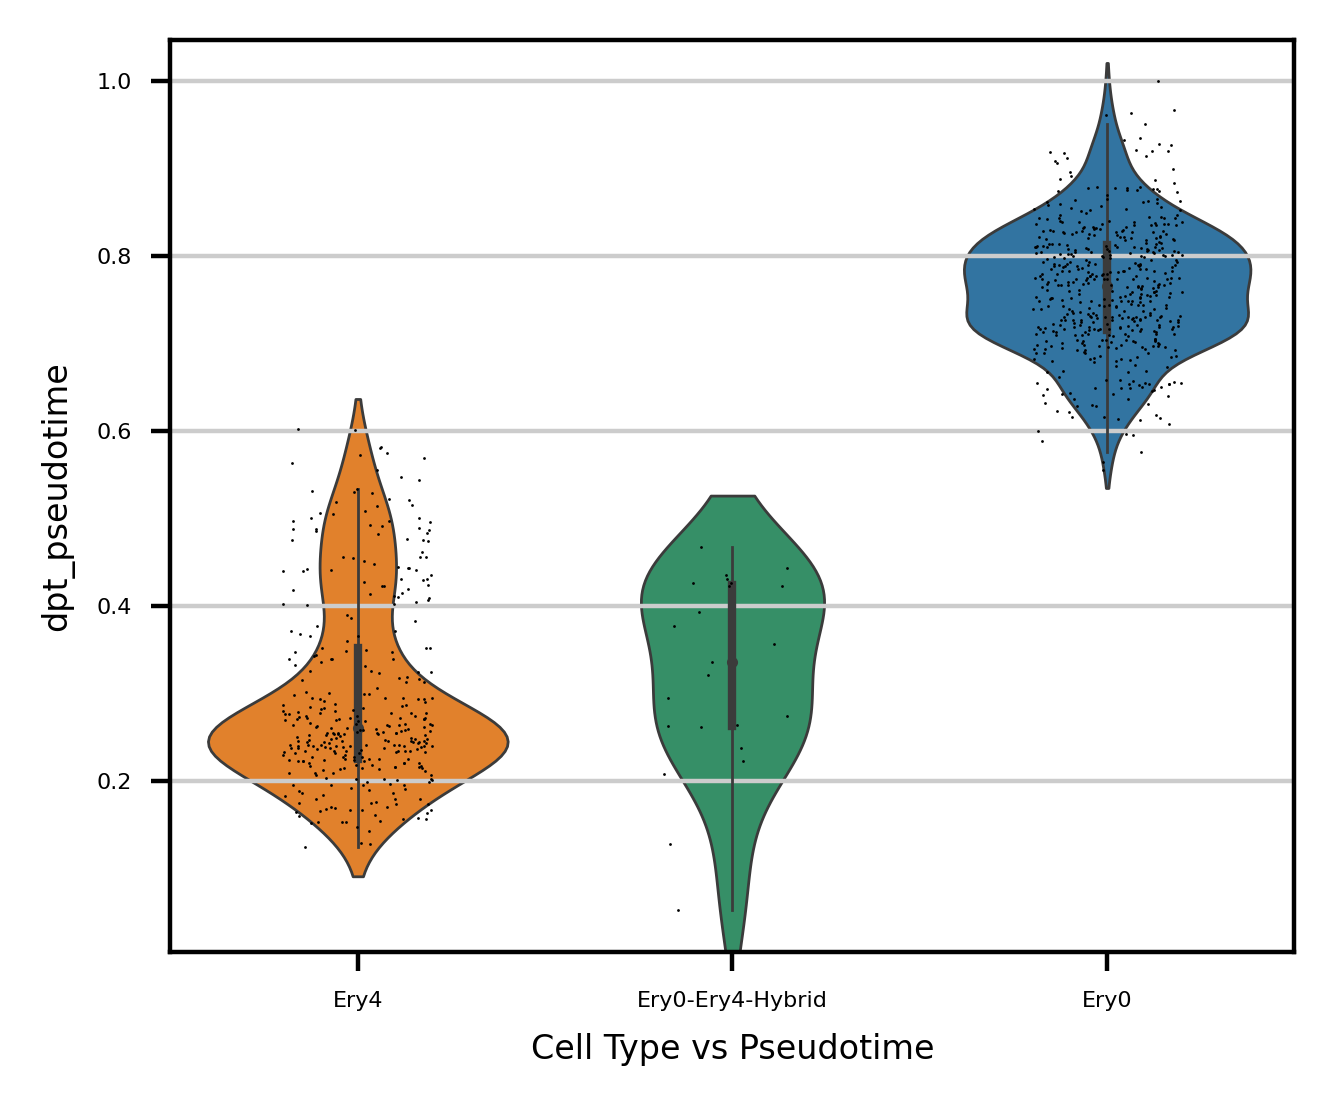

In [20]:
from matplotlib import rc_context
from matplotlib.lines import Line2D
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (4, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Filter the AnnData object
    filtered_adata = adata[adata.obs["cell_type_w_hybrids"].isin(["Ery0", "Ery4","Ery0-Ery4-Hybrid"])]
    # Plot the graph
    fig = sc.pl.violin(
        filtered_adata,
        ["dpt_pseudotime"],
        groupby="cell_type_w_hybrids",
        order=["Ery4","Ery0-Ery4-Hybrid","Ery0"],
        rotation=0.0,
        linewidth=0.5,
        jitter=0.2,
        size=0.5,
        scale="area",
        inner="box",
        cut=1.0,
        xlabel="Cell Type vs Pseudotime",
        multi_panel=True,
        show=False
    )
    pl.savefig("./output/ery0-ery4-hyb.voilin.png")
    pl.show()

### 4. Plotting Monocyte Progenitor-Neutrophils Hybrids

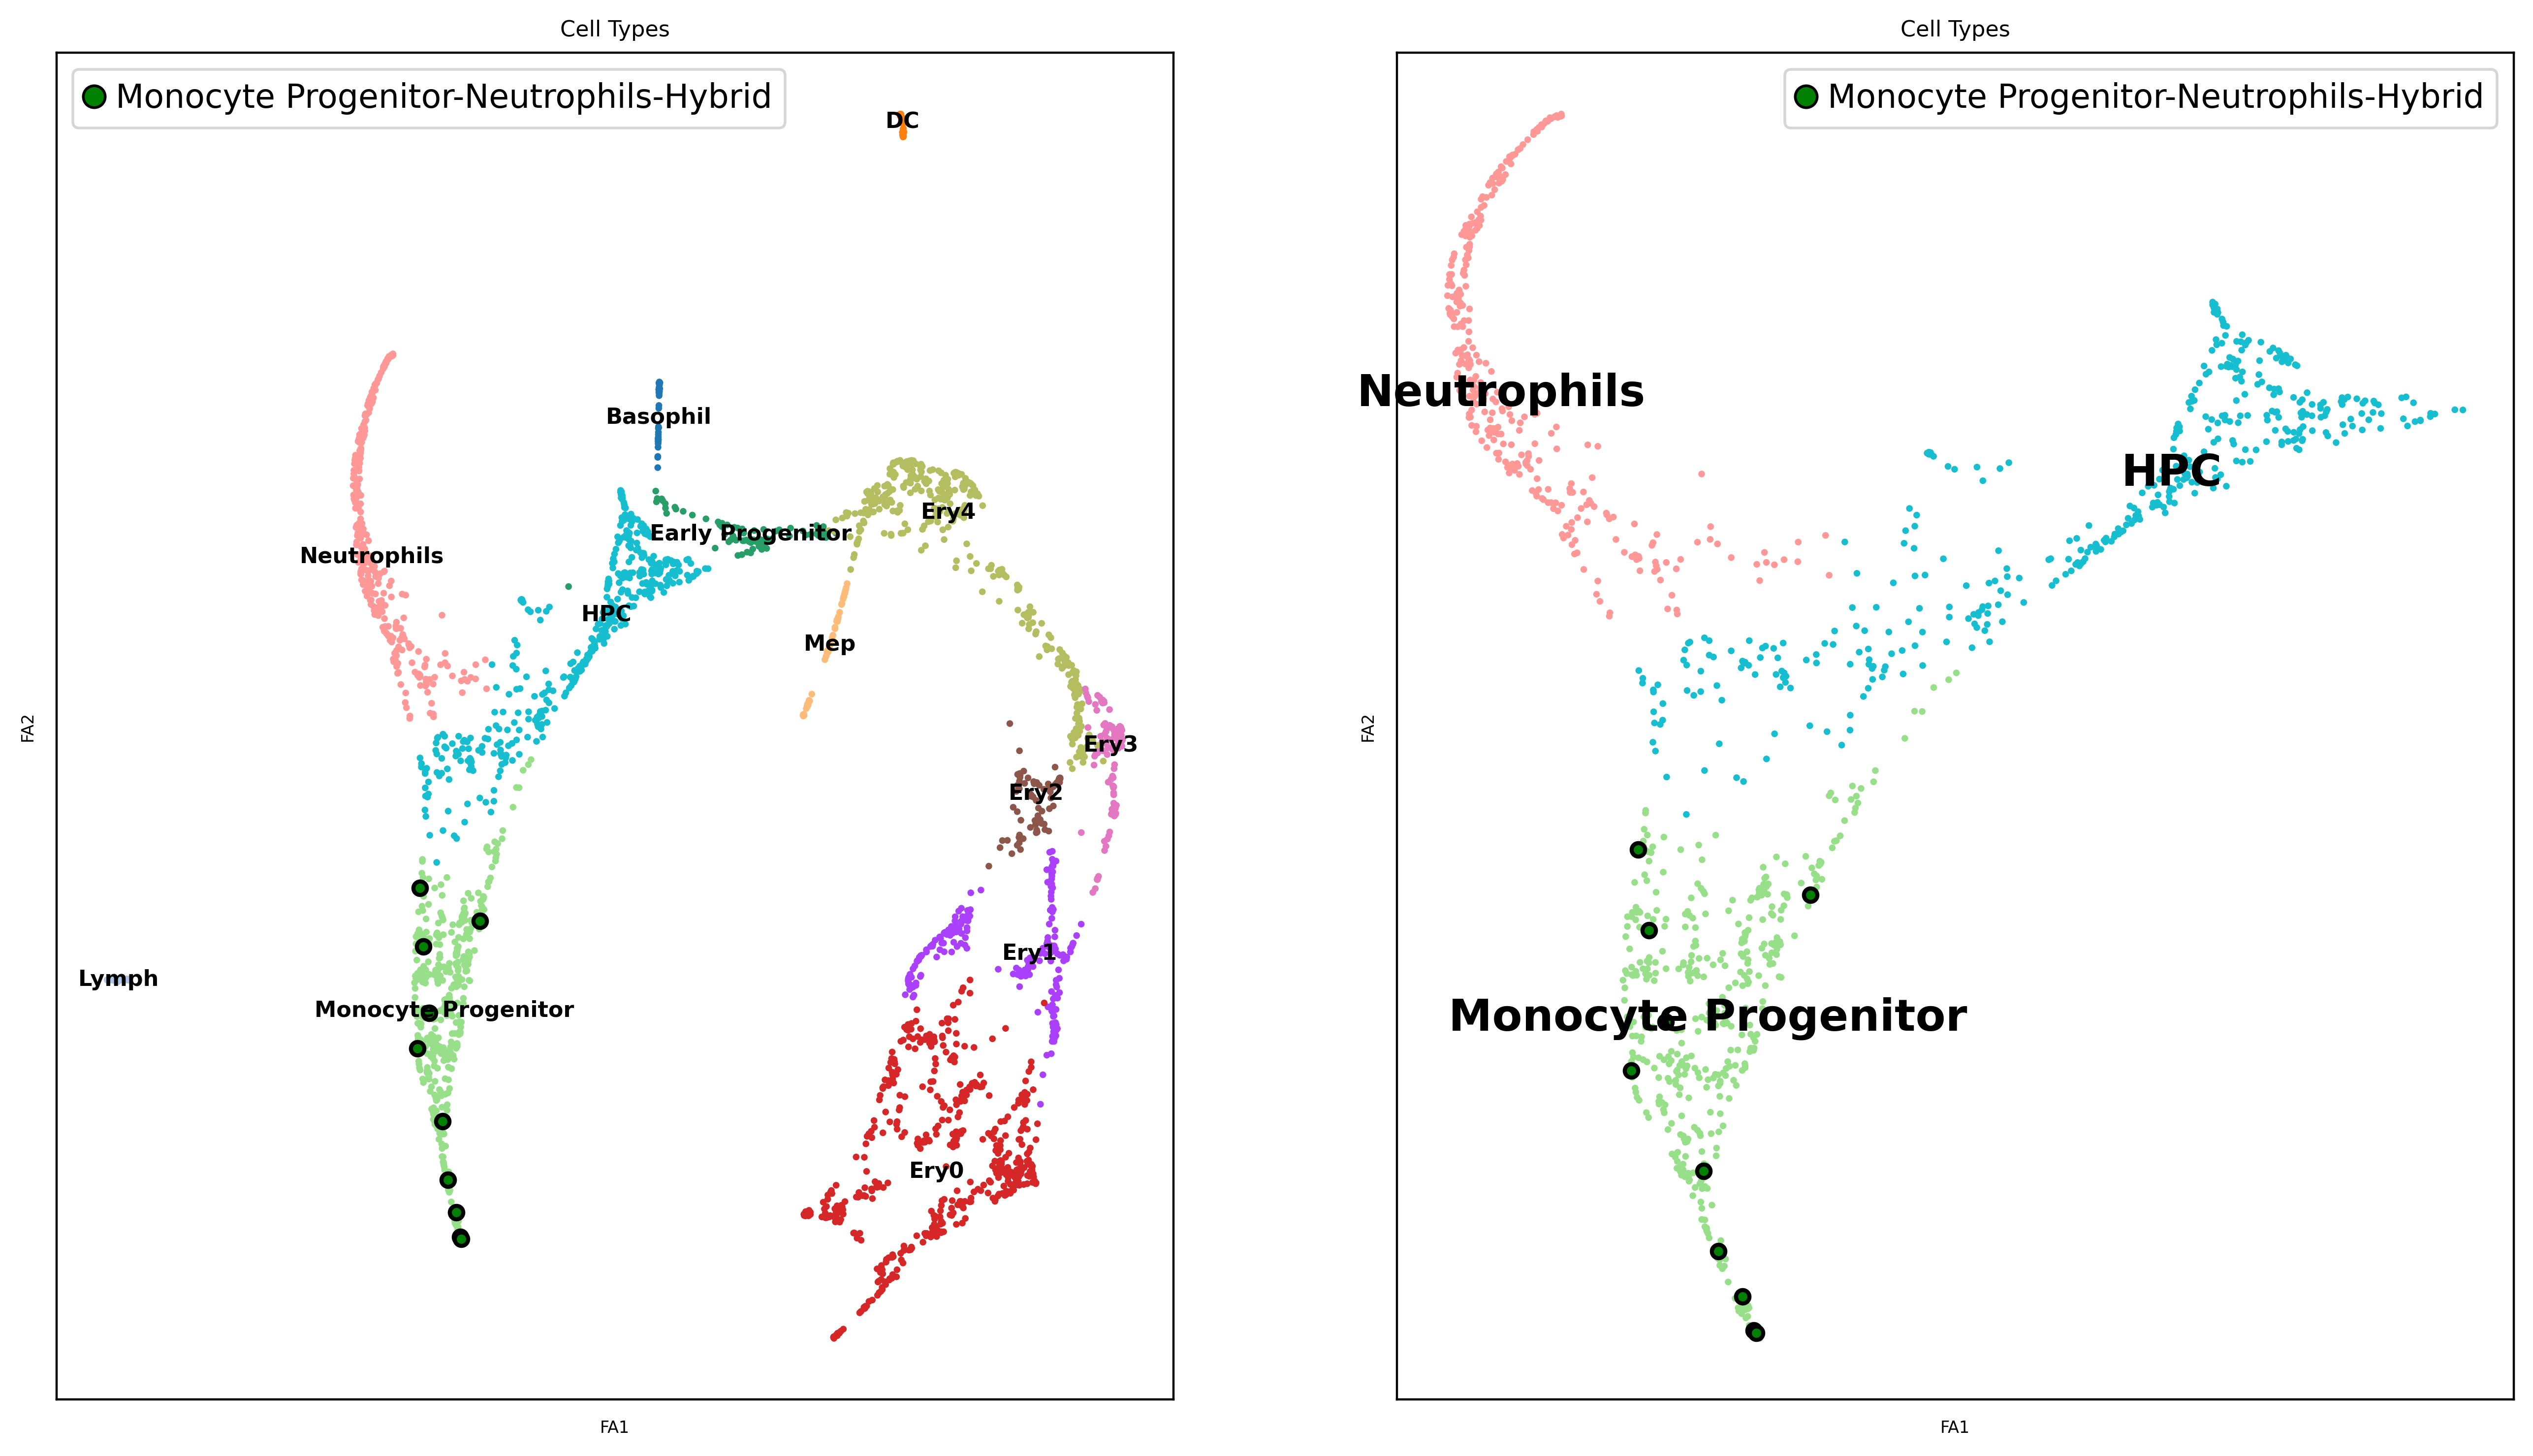

In [21]:
from matplotlib import rc_context
from matplotlib.lines import Line2D
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (16, 9),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Filter the AnnData object
    filtered_adata = adata[adata.obs["cell_type"].isin(["Monocyte Progenitor", "HPC", "Neutrophils"])]
    # Plot the graph
    # Create a figure with two subplots
    fig, axes = pl.subplots(1, 2)
    sc.pl.draw_graph(
        adata, 
        color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=24,
        legend_fontsize=8,
        frameon=True,
        edges=False,
        ax=axes[0],  # Use the first axis
        show=False
    )
    sc.pl.draw_graph(
        filtered_adata, 
        color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=24,
        legend_fontsize=16,
        frameon=True,
        edges=False,
        ax=axes[1],  # Use the first axis
        show=False
    )
    
    # Get the coordinates for the scatter plot
    x = filtered_adata.obsm['X_draw_graph_fa'][:, 0]
    y = filtered_adata.obsm['X_draw_graph_fa'][:, 1]
    
    # Overlay scatter plot for a specific cell type with different edge color
    specific_cell_type = "Monocyte Progenitor-Neutrophils-Hybrid"  # Specify the cell type
    specific_idx = filtered_adata.obs['cell_type_w_hybrids'] == specific_cell_type

    # Scatter plot for the specific cell type with an outline
    axes[0].scatter(
        x[specific_idx], y[specific_idx], 
        facecolors='green', edgecolors='black', linewidth=1.5, s=24
    )
    # Scatter plot for the specific cell type with an outline
    axes[1].scatter(
        x[specific_idx], y[specific_idx], 
        facecolors='green', edgecolors='black', linewidth=1.5, s=24
    )
    # Create custom legends
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Monocyte Progenitor-Neutrophils-Hybrid', markerfacecolor='green', markeredgecolor='black', markersize=8),
    ]

    axes[0].legend(handles=legend_elements, loc='best', fontsize=12)
    axes[1].legend(handles=legend_elements, loc='best', fontsize=12)
    pl.savefig("./output/mono-neutro-hyb.scatter.png")
    pl.show()

/usr/local/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/local/lib/python3.7/contextlib.py:119: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


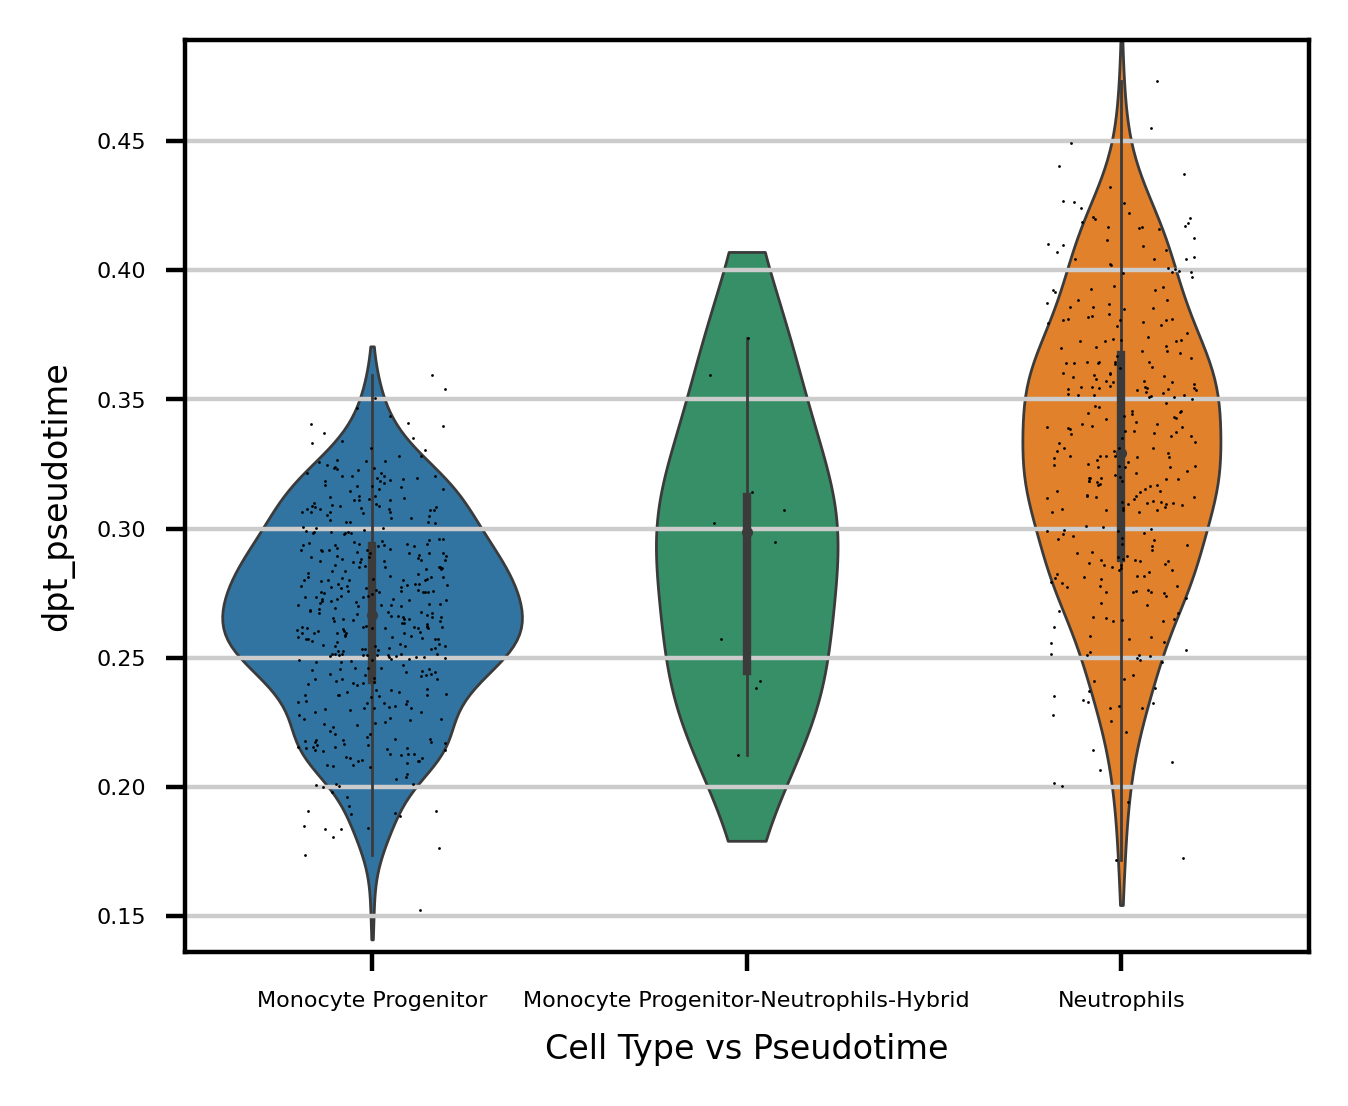

In [22]:
from matplotlib import rc_context
from matplotlib.lines import Line2D
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (4, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Filter the AnnData object
    filtered_adata = adata[adata.obs["cell_type_w_hybrids"].isin(["Monocyte Progenitor", "Monocyte Progenitor-Neutrophils-Hybrid", "Neutrophils"])]
    # Plot the graph
    fig = sc.pl.violin(
        filtered_adata,
        ["dpt_pseudotime"],
        groupby="cell_type_w_hybrids",
        order=["Monocyte Progenitor", "Monocyte Progenitor-Neutrophils-Hybrid", "Neutrophils"],
        rotation=0.0,
        linewidth=0.5,
        jitter=0.2,
        size=0.5,
        scale="area",
        inner="box",
        cut=1.0,
        xlabel="Cell Type vs Pseudotime",
        multi_panel=True,
        show=False
    )
    pl.savefig("./output/mono-neutro-hyb.voilin.png")
    pl.show()

### 5. Plotting HPC-Neutrophils Hybrids

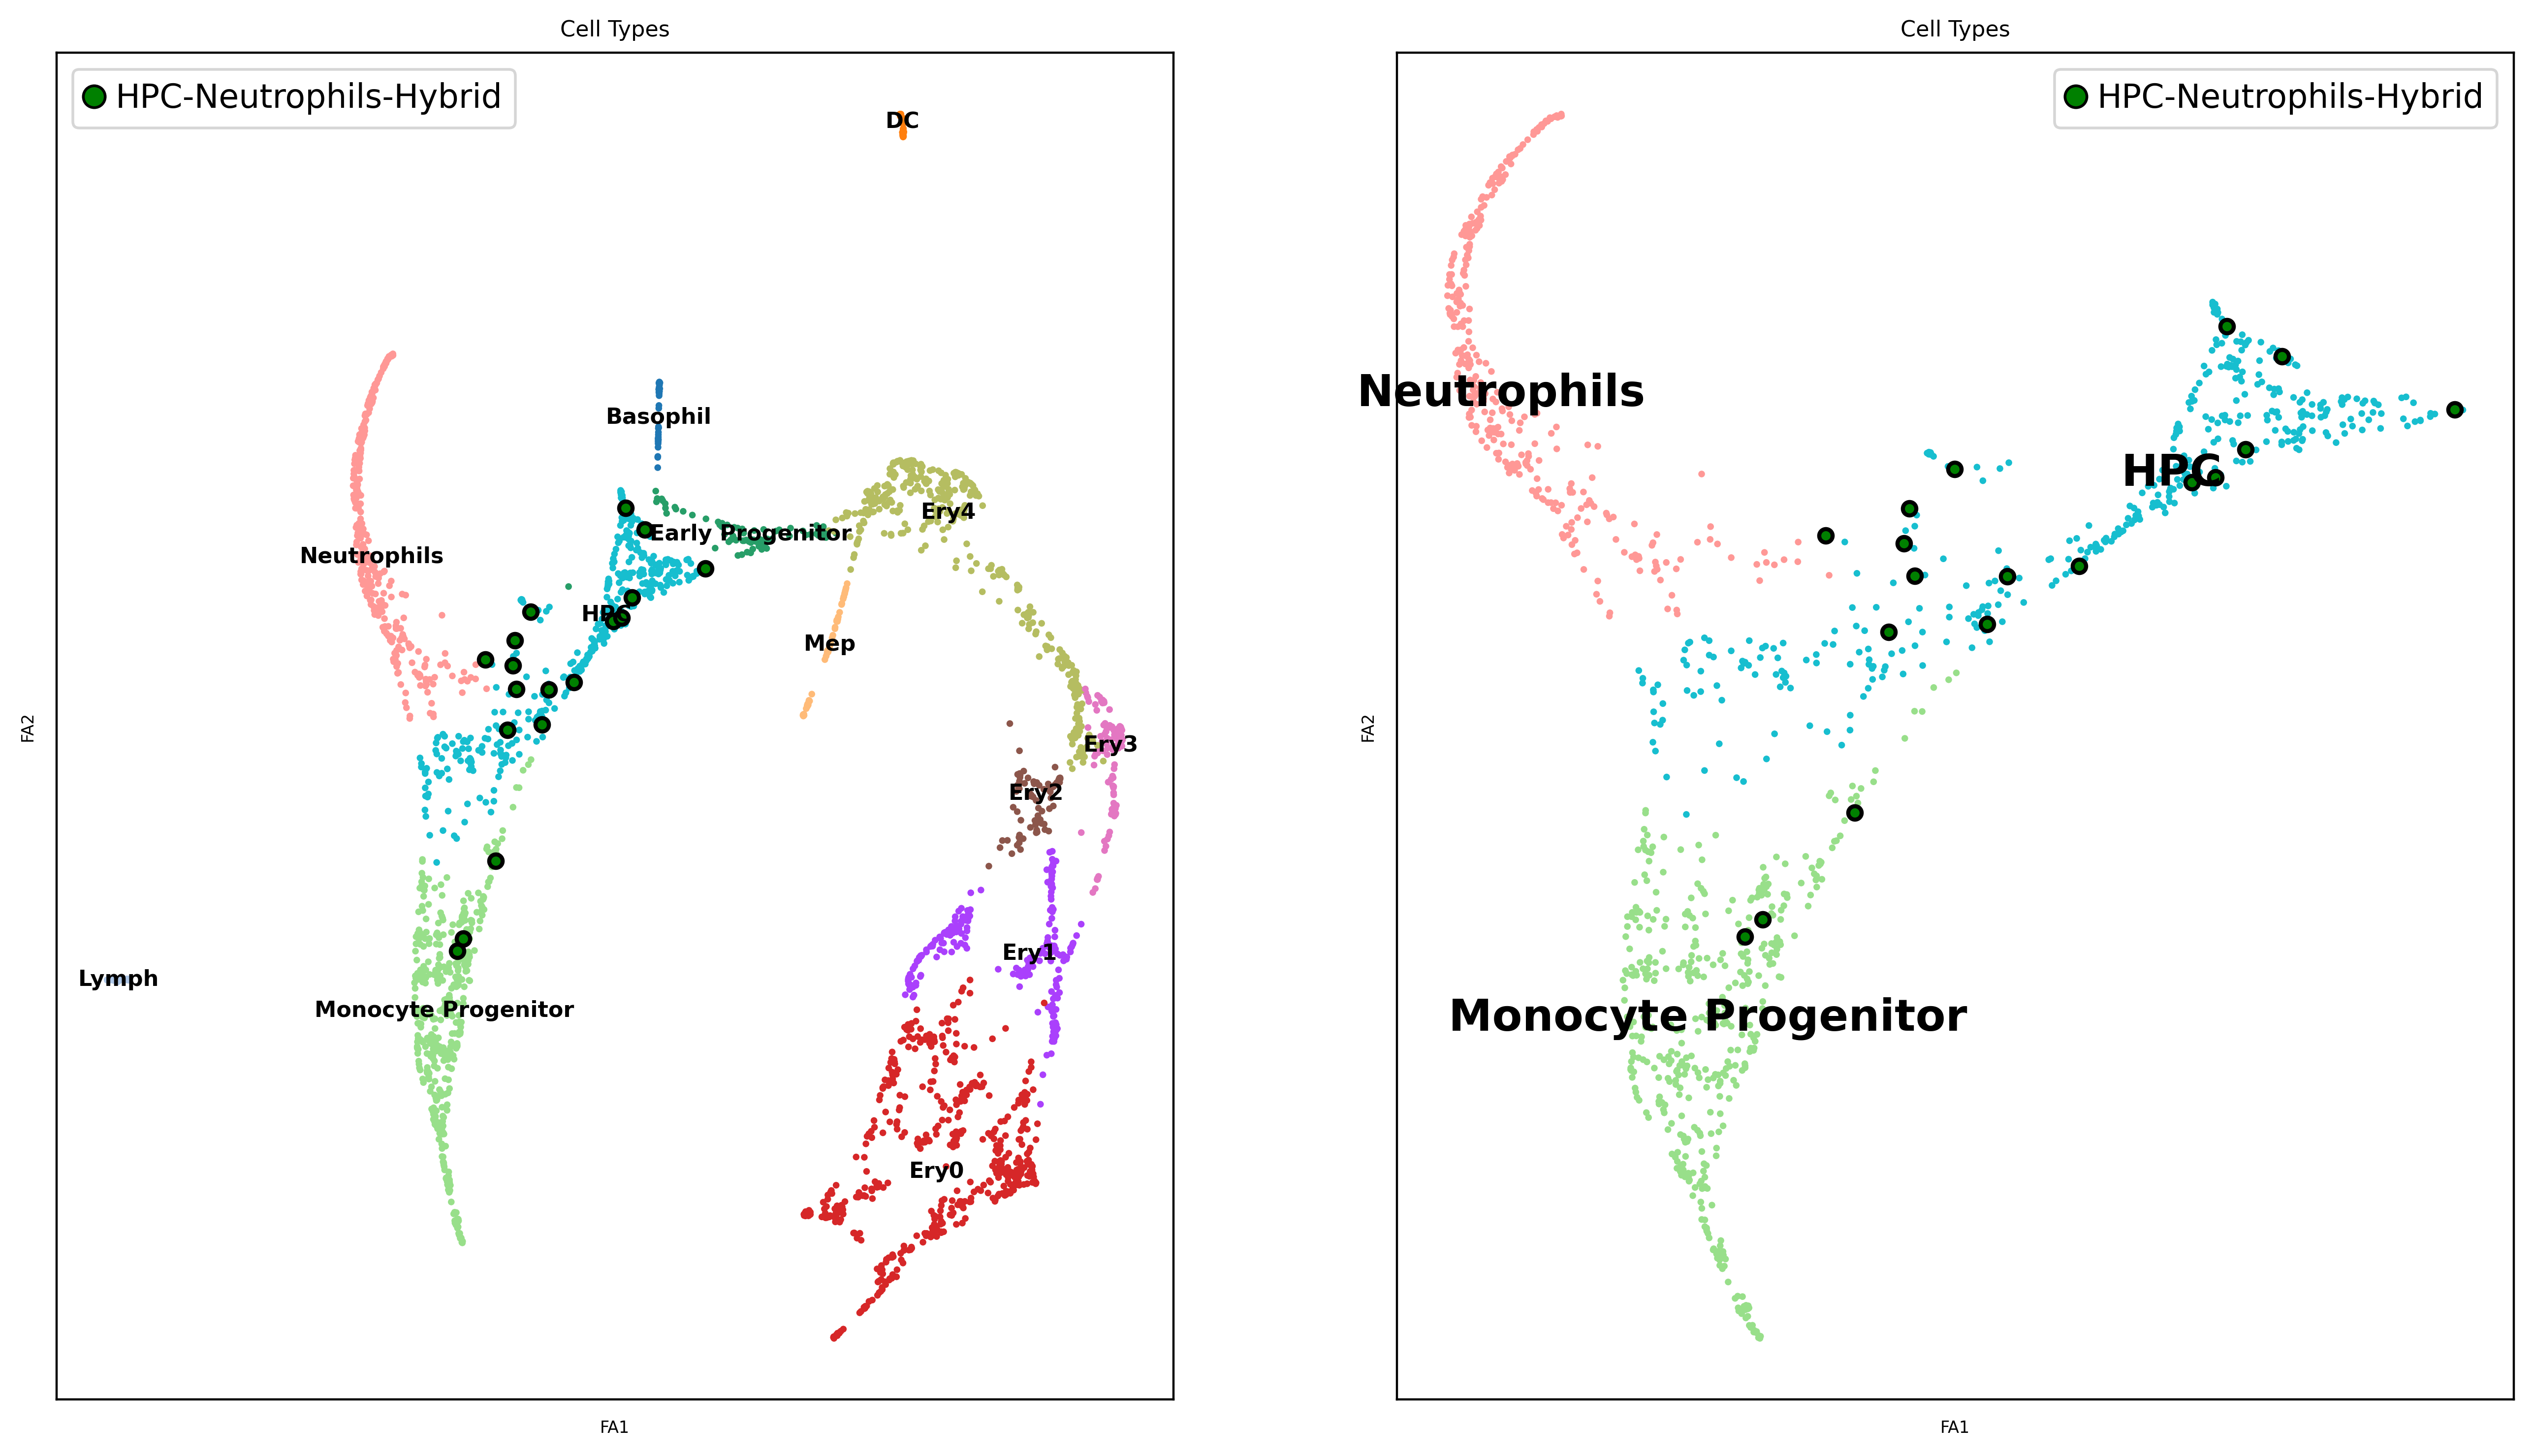

In [24]:
from matplotlib import rc_context
from matplotlib.lines import Line2D
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (16, 9),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Filter the AnnData object
    filtered_adata = adata[adata.obs["cell_type"].isin(["Monocyte Progenitor", "HPC", "Neutrophils"])]
    # Plot the graph
    # Create a figure with two subplots
    fig, axes = pl.subplots(1, 2)
    sc.pl.draw_graph(
        adata, 
        color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=24,
        legend_fontsize=8,
        frameon=True,
        edges=False,
        ax=axes[0],  # Use the first axis
        show=False
    )
    sc.pl.draw_graph(
        filtered_adata, 
        color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=24,
        legend_fontsize=16,
        frameon=True,
        edges=False,
        ax=axes[1],  # Use the first axis
        show=False
    )
    
    # Get the coordinates for the scatter plot
    x = filtered_adata.obsm['X_draw_graph_fa'][:, 0]
    y = filtered_adata.obsm['X_draw_graph_fa'][:, 1]
    
    # Overlay scatter plot for a specific cell type with different edge color
    specific_cell_type = "HPC-Neutrophils-Hybrid"  # Specify the cell type
    specific_idx = filtered_adata.obs['cell_type_w_hybrids'] == specific_cell_type

    # Scatter plot for the specific cell type with an outline
    axes[0].scatter(
        x[specific_idx], y[specific_idx], 
        facecolors='green', edgecolors='black', linewidth=1.5, s=24
    )
    # Scatter plot for the specific cell type with an outline
    axes[1].scatter(
        x[specific_idx], y[specific_idx], 
        facecolors='green', edgecolors='black', linewidth=1.5, s=24
    )
    # Create custom legends
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='HPC-Neutrophils-Hybrid', markerfacecolor='green', markeredgecolor='black', markersize=8),
    ]

    axes[0].legend(handles=legend_elements, loc='best', fontsize=12)
    axes[1].legend(handles=legend_elements, loc='best', fontsize=12)
    pl.savefig("./output/hpc-neutro-hyb.scatter.png")
    pl.show()

/usr/local/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/usr/local/lib/python3.7/contextlib.py:119: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


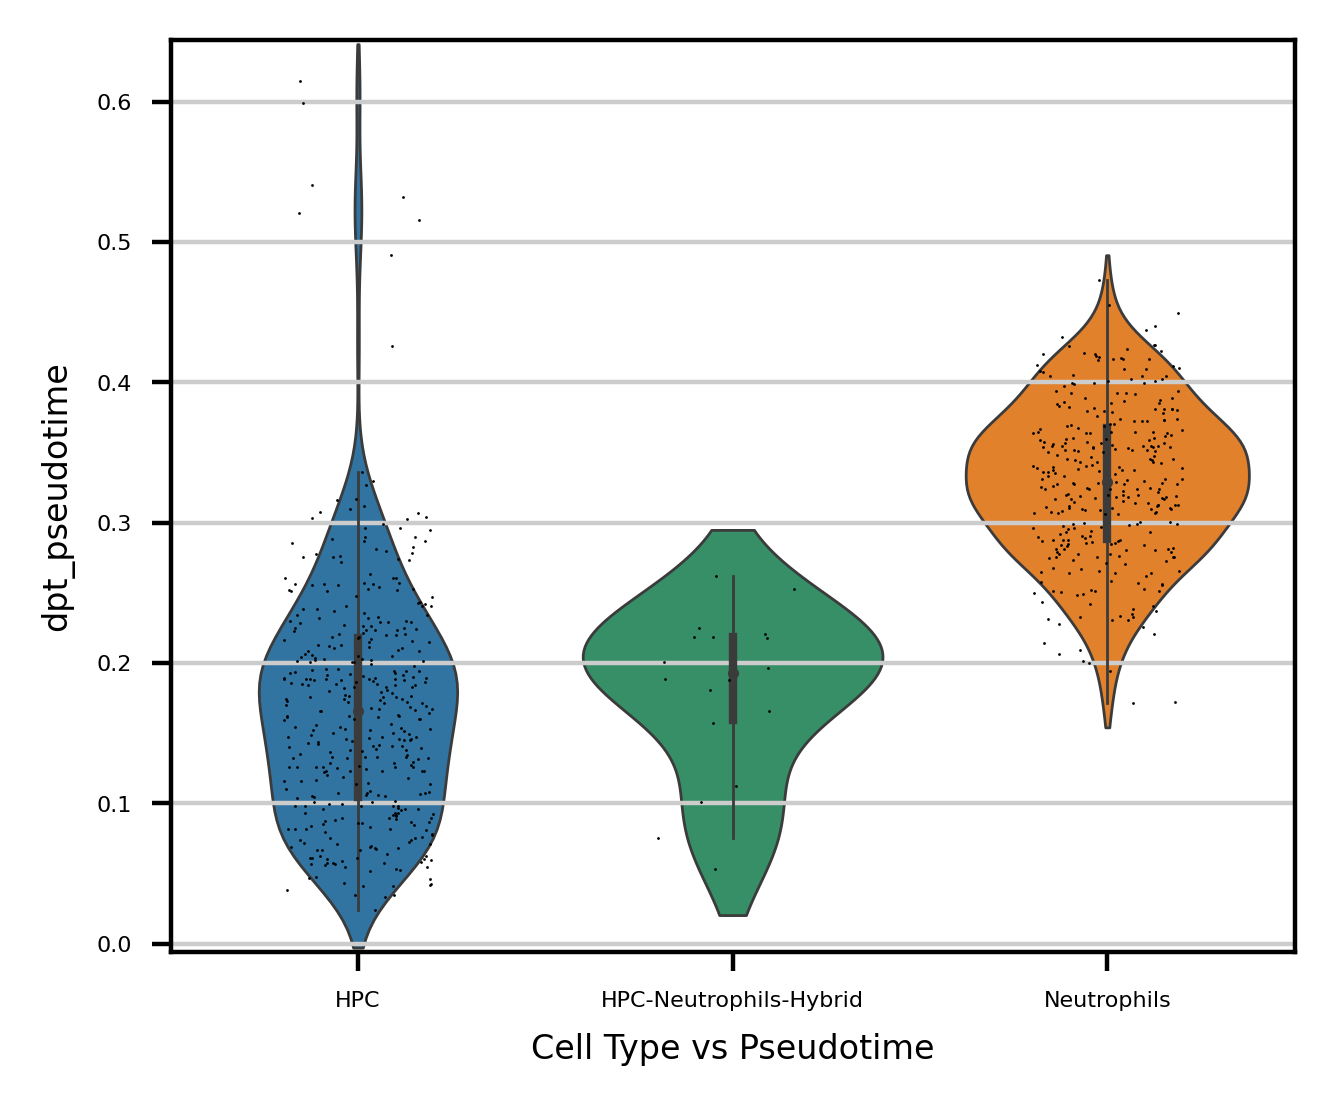

In [25]:
from matplotlib import rc_context
from matplotlib.lines import Line2D
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (4, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Filter the AnnData object
    filtered_adata = adata[adata.obs["cell_type_w_hybrids"].isin([ "HPC-Neutrophils-Hybrid", "Neutrophils","HPC"])]
    # Plot the graph
    sc.pl.violin(
        filtered_adata,
        ["dpt_pseudotime"],
        groupby="cell_type_w_hybrids",
        order=["HPC", "HPC-Neutrophils-Hybrid", "Neutrophils"],
        rotation=0.0,
        linewidth=0.5,
        jitter=0.2,
        size=0.5,
        scale="area",
        inner="box",
        cut=1.0,
        xlabel="Cell Type vs Pseudotime",
        multi_panel=True,
        show=False
    )
    pl.savefig("./output/hpc-neutro-hyb.volin.png")
    pl.show()